In [24]:
import networkx as nx
import numpy as np
import pickle

In [2]:
G = nx.MultiDiGraph()

In [3]:
x = np.array([[1],[2],[3]])
x = tuple(x[:,0])
y = np.array([[4],[5],[6]])
y = tuple(y[:,0])
z = np.array([[7],[8],[9]])
z = tuple(z[:,0])

In [4]:
G.add_node(x)
G.add_node(y)
G.add_node(z)
G.add_edge(x,y)
G.add_edge(y,z)
G.add_edge(x,z)
G.add_edge(x,z)

1

In [5]:
G.edges

OutMultiEdgeView([((1, 2, 3), (4, 5, 6), 0), ((1, 2, 3), (7, 8, 9), 0), ((1, 2, 3), (7, 8, 9), 1), ((4, 5, 6), (7, 8, 9), 0)])

In [10]:
G[x]

AdjacencyView({(4, 5, 6): {0: {}}, (7, 8, 9): {0: {}, 1: {}}})

array([[0., 1., 2.],
       [0., 0., 1.],
       [0., 0., 0.]])

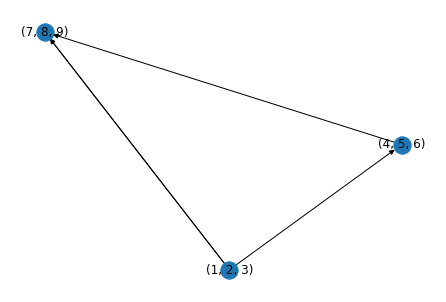

In [22]:
nx.draw(G,with_labels=1)
A = nx.to_numpy_array(G,nodelist=[x,y,z])
A

In [80]:
test = pickle.load( open( "ScrapedSongsKeyC.p", "rb" ) )
#test = test = pickle.load( open( "ScrapedSongs100.p", "rb" ) )

array = test.iloc[0,5]
print(array[:,0:9],'\n')
#print(array.T)
test

[['-' '-' '-' '-' '3' '3' '3' '3' '3']
 ['-' '-' '-' '-' '3' '3' '3' '3' '3']
 ['-' '-' '-' '-' '0' '0' '0' '0' '0']
 ['-' '-' '0' '2' '2' '2' '2' '2' '2']
 ['0' '2' '-' '-' '2' '2' '2' '2' '2']
 ['-' '-' '-' '-' 'x' 'x' 'x' 'x' 'x']] 



,Name,URL,Key,Tuning,Capo,Tabs
0,Wish You Were Here (ver 5),https://tabs.ultimate-guitar.com/tab/pink-floy...,C,E A D G B E,0,"[[-, -, -, -, 3, 3, 3, 3, 3, 3, -, -, -, 3, 3,..."
1,Dust In The Wind,https://tabs.ultimate-guitar.com/tab/kansas/du...,C,E A D G B E,0,"[[-, -, -, -, -, -, -, -, -, -, -, -, -, -, -,..."
2,Wish You Were Here (ver 4),https://tabs.ultimate-guitar.com/tab/pink-floy...,C,E A D G B E,0,"[[-, -, -, -, -, 3, -, -, -, -, 3, -, -, -, -,..."
3,The Last Of Us - Main Theme (ver 5),https://tabs.ultimate-guitar.com/tab/misc-comp...,C,,0,"[[-, -, -, 0, -, -, -, 0, -, -, -, 0, -, -, -,..."
4,Cant Help Falling In Love (ver 2),https://tabs.ultimate-guitar.com/tab/elvis-pre...,C,E A D G B E,7,"[[-, -, -, -, -, -, -, -, -, -, -, -, -, -, 0,..."
...,...,...,...,...,...,...
869,Basin Street Blues,https://tabs.ultimate-guitar.com/tab/ray-charl...,C,E A D G B E,0,"[[-, -, -, -, -, -, 3, 3, 0, -, 1, -, 2, 3, -,..."
870,You Spin Me Round Like A Record Intro (ver 2),https://tabs.ultimate-guitar.com/tab/dead-or-a...,C,E A D G B E,0,"[[-, -, -, 2, 2, -, -, 4, 2, -, -, -, 4, 2, -,..."
871,Song For The Asking (ver 4),https://tabs.ultimate-guitar.com/tab/simon-gar...,C,Eb Ab Db Gb Bb Eb,0,"[[-, 0, 0, -, 0, 0, -, 0, 0, -, 0, 0, -, -, -,..."
872,The Guilty Have No Pride Intro,https://tabs.ultimate-guitar.com/tab/death-in-...,C,E A D G B E,0,"[[-, -, -, -, -, -, -, -, -, -], [-, -, -, -, ..."


[('-', '-', '-', '7', '-', '-'), ('-', '-', '5', '-', '-', '-'), ('-', '5', '-', '-', '-', '-'), ('5', '-', '-', '-', '-', '-'), ('7', '-', '-', '6', '-', '-'), ('7', '-', '-', '-', '-', '-'), ('8', '-', '-', '5', '-', '-'), ('8', '-', '-', '-', '-', '-'), ('2', '-', '-', '4', '-', '-'), ('-', '3', '-', '-', '-', '-'), ('-', '-', '2', '-', '-', '-'), ('2', '-', '-', '-', '-', '-'), ('0', '-', '-', '3', '-', '-'), ('-', '1', '-', '-', '-', '-'), ('0', '-', '-', '-', '-', '-'), ('-', '0', '0', '-', '2', '-'), ('-', '1', '2', '-', '0', '-'), ('-', '-', '2', '-', '0', '-'), ('-', '-', '-', '-', '8', '-'), ('-', '-', '-', '-', '7', '-'), ('-', '-', '-', '-', '0', '-'), ('-', '-', '-', '-', '2', '-'), ('-', '-', '-', '-', '3', '-'), ('-', '-', '-', '2', '-', '-'), ('-', '-', '0', '-', '-', '-'), ('2', '-', '-', '0', '-', '-'), ('-', '0', '-', '-', '0', '-'), ('-', '1', '-', '-', '3', '-'), ('3', '-', '-', '-', '-', '3'), ('-', '0', '-', '-', '-', '-'), ('3', '-', '-', '-', '-', '-'), ('3', '

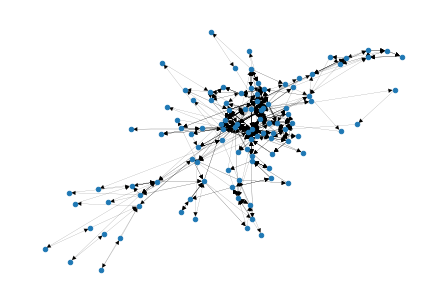

In [71]:
test_tuple = tuple(array[:,0])
G = nx.MultiDiGraph()
nodes = []
G.add_node(tuple(array[:,0]))
nodes.append(tuple(array[:,0]))

for i in range(1,array.shape[1]):
    current = tuple(array[:,i])
    prev = tuple(array[:,i-1])
    if current not in G: 
        G.add_node(current)
        nodes.append(current)
    G.add_edge(prev,current)
nx.draw(G,with_labels=0,node_size=20,width=.1)
adjacency = nx.to_numpy_array(G,nodelist=nodes)
print(nodes,'\n')
print(adjacency.shape)


150626


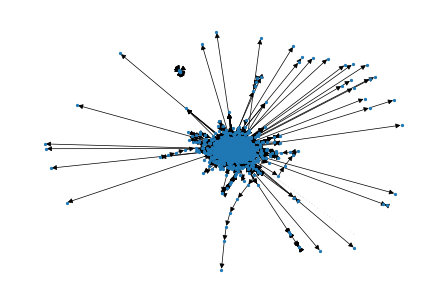

In [135]:
G = nx.MultiDiGraph()
nodes = []
totalNotes = 0
for songNum in range(0,873):
    if test.iloc[songNum,4] == 0:
#         if songNum % 10 == 0:
#             print('On song number:',songNum)
        array = test.iloc[songNum,5]
        totalNotes += array.shape[1]
        if tuple(array[:,0]) not in G:
            G.add_node(tuple(array[:,0]))
            nodes.append(tuple(array[:,0]))

        for i in range(1,array.shape[1]):
            current = tuple(array[:,i])
            prev = tuple(array[:,i-1])
            if current not in G: 
                G.add_node(current)
                nodes.append(current)
            G.add_edge(prev,current)
    
nx.draw(G,with_labels=0,node_size = 5, width = .7)
adjacency = nx.to_numpy_array(G,nodelist=nodes)
adjacency.shape
print(totalNotes)

In [167]:
import matplotlib.pyplot as plt

adjacency
#plt.imshow(adjacency)
np.savetxt('song.txt', song)

TypeError: Mismatch between array dtype ('<U1') and format specifier ('%.18e %.18e %.18e %.18e %.18e %.18e')

In [131]:
def fullprint(*args, **kwargs):
    from pprint import pprint
    import numpy
    opt = numpy.get_printoptions()
    numpy.set_printoptions(threshold=numpy.inf)
    pprint(*args, **kwargs)
    numpy.set_printoptions(**opt)

In [141]:
# for row in adjacency:
#     if np.sum(row) == 0:
#         print("Error")

In [133]:
#divide each element by the sum of its row to get transition probability matrix, in which each row sums to 1
transition_matrix = np.divide(adjacency ,np.array([np.sum(adjacency,axis=1)]).T) 
#fullprint(np.sum(transition_matrix,axis=1))


<ipython-input-133-09c8ee1afd57>:2: RuntimeWarning: invalid value encountered in true_divide
  transition_matrix = np.divide(adjacency ,np.array([np.sum(adjacency,axis=1)]).T)
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [137]:
n = transition_matrix.shape[0]
X = [np.random.choice(n, p=transition_matrix[0,:])]  # p is a needed input for np.random.choice()
for t in range(1,100):
    X.append(np.random.choice(n, p=transition_matrix[X[t-1],:])) 

In [166]:
song = np.array([nodes[X[0]]])
for i in range(1,len(X)):
    song = np.append(song,[nodes[X[i]]],axis=0)
song[0:10,:].T


array([['-', '2', '-', '-', '0', '-', '-', '-', '-', '0'],
       ['-', '3', '-', '-', '1', '-', '-', '1', '3', '-'],
       ['-', '4', '-', '-', '0', '-', '-', '-', '-', '-'],
       ['-', 'x', '-', '-', '2', '-', '-', '-', '-', '-'],
       ['-', 'x', '-', '3', '3', '3', '2', '-', '-', '-'],
       ['3', 'x', '5', '-', '-', '-', '-', '-', '-', '-']], dtype='<U1')

In [157]:
print(nodes[0])
print(nodes[1])
#for(note in X):
np.append([nodes[0]],[nodes[1]],axis = 0).T

('-', '-', '-', '-', '0', '-')
('-', '-', '-', '-', '2', '-')


array([['-', '-'],
       ['-', '-'],
       ['-', '-'],
       ['-', '-'],
       ['0', '2'],
       ['-', '-']], dtype='<U1')

In [127]:
x = np.ones((3,3))
z = np.divide(x,y.T)
y = np.array([[1,2,3]])
y.T
z
x += [[1],[2],[3]]
print(x)
print(np.array([np.sum(x,axis=1)]).T)
np.divide(x ,np.array([np.sum(x,axis=1)]).T)


[[2. 2. 2.]
 [3. 3. 3.]
 [4. 4. 4.]]
[[ 6.]
 [ 9.]
 [12.]]


array([[0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333]])

In [177]:
songList = ['-'.join(row) for row in song.T]
songList = [row + '\n' for row in songList]
print(songList)

file1 = open('songTest.txt', 'w')
file1.writelines(songList)
file1.close()

['--2-----0---------0-------------3-------------------------------------------8-7-------------------------1-2-1-2-0-0-2-5-8-7-7-5-7-7-8-1-5-1-------------------------0---------------0------------------\n', '--3-----1-----1-3---------------------1-----3-0---------1-0-----------0---0---------------8-1-0---------1-2-1-2-2-2-2-6-6-8-8-6-8-8-------------------------------0---1-3-1-0-3-1-----3-1-----0-3------\n', '--4-----0-----------4---------5---0-0-----0-----2-----4-----0-2-----2---0-------7-7-5-7-------------0---1-2-1-2-2-2-2-7-7-9-9-7-7-9-----------0---------5-5---2-------------------0---------0-------0-2\n', '--x-----2-------------7-5-5-7---2-------------0-----2-----------------------------------5-------------0-------------------------------------0-----1-5-7-----------------2-------------------------0----\n', '--x---3-3-3-2-------------------------------------0---------------------------------------------------------------------------------------------2-----------0---3-----3-------0---

In [ ]:

def writeSongToFile(song,filename):
    file1 = open('songTest.txt', 'w')
    songList = [''.join(row) for row in song]
    

In [186]:
f = open("Amit.txt", "r")
subjects = []
for subject in f:
    if subject[-1:] == '\n':
        subjects.append('{ title: \"' + subject[0:-1] + '\", color: catColors.tutoring },\n')
    else:
        subjects.append('{ title: \"' + subject + '\", color: catColors.tutoring },\n')
subjects
f.close()
f = open("AmitOutput.txt",'w')
f.writelines(subjects)
f.close()
print(subjects)
#{ title: "subject", color: catColors.tutoring },

['{ title: "Algebra I", color: catColors.tutoring },\n', '{ title: "Algebra II", color: catColors.tutoring },\n', '{ title: "Algebra in Spanish", color: catColors.tutoring },\n', '{ title: "Applied Calculus", color: catColors.tutoring },\n', '{ title: "Basic Math", color: catColors.tutoring },\n', '{ title: "Basic Math in Spanish", color: catColors.tutoring },\n', '{ title: "Business Statistics", color: catColors.tutoring },\n', '{ title: "Calculus I, II, III, IV", color: catColors.tutoring },\n', '{ title: "Calculus BC", color: catColors.tutoring },\n', '{ title: "Calculus in Spanish", color: catColors.tutoring },\n', '{ title: "College Algebra", color: catColors.tutoring },\n', '{ title: "Differential Equations", color: catColors.tutoring },\n', '{ title: "Discrete Math", color: catColors.tutoring },\n', '{ title: "Finite Math", color: catColors.tutoring },\n', '{ title: "Geometry", color: catColors.tutoring },\n', '{ title: "Geometry in Spanish", color: catColors.tutoring },\n', '{ 

In [185]:
test = 'blahblah\n'
test[0:-1]
test[-1:]

'\n'